In [28]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from torchvision.datasets import MNIST

### 논리 회로 AND, OR, NAND 게이트 정의

In [9]:
#AND GATE
def AND(x1, x2):
  x = np.array([x1, x2])
  w = np.array([0.5, 0.5])
  b = -0.7
  tmp = np.sum(w*x) + b
  if tmp <= 0:
    return 0
  else:
    return 1




#OR GATE
def OR(x1, x2):
  x = np.array([x1, x2])
  w = np.array([0.5, 0.5])
  b = -0.2
  tmp = np.sum(w*x) + b
  if tmp <= 0:
    return 0
  else:
    return 1




#NAND GATE
def NAND(x1, x2):
  x = np.array([x1, x2])
  w = np.array([-0.5, -0.5])
  b = 0.7
  tmp = np.sum(w*x) + b
  if tmp <= 0:
    return 0
  else:
    return 1

print(AND(1,1),AND(1,0),OR(1,0),OR(0,0),NAND(1,1),NAND(0,0))

1 0 1 0 0 1


### XOR 게이트 구현

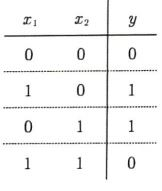

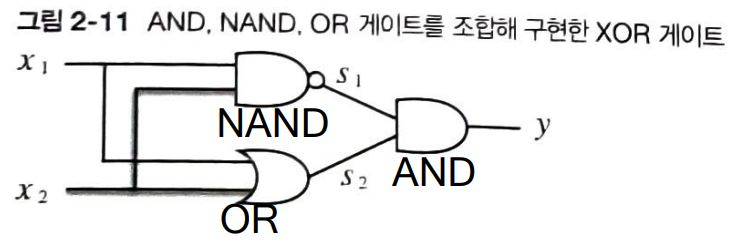

In [10]:
#XOR 함수 생성
def XOR(x1, x2):

  s1 = NAND(x1, x2)
  s2 = OR(x1, x2)
  y = AND(s1, s2)

  return y

print(XOR(1,1), XOR(1,0), XOR(0,1), XOR(0,0))

0 1 1 0


### 경사하강법

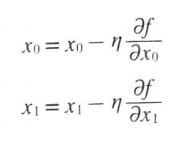

In [12]:
#수치미분을 이용한 경사하강법

def numerical_gradient(f,x):
  h = 1e-4
  grad = np.zeros_like(x)   #x와 형상이 같은 배열 생성

  for idx in range(x.size):
    tmp_val = x[idx]

    x[idx] = tmp_val + h
    fxh1 = f(x)

    x[idx] = tmp_val - h
    fxh2 = f(x)

    grad[idx] = (fxh1 - fxh2)/(2 * h)

  return grad


#경사하강법 코드
def gradient_descent(f, init_x, lr = 0.01, step_num = 100):

  x = init_x  #x의 초기값

  for i in range(step_num):
    grad = numerical_gradient(f,x)
    x -= lr * grad

  return x


경사하강법을 이용해 $f(x0, x1)$ = $x_{0}^2+x_{1}^2$ 이 최소가 되는 (x0, x1) 구하기

$f(x0, x1)$ = $x_{0}^2+x_{1}^2$

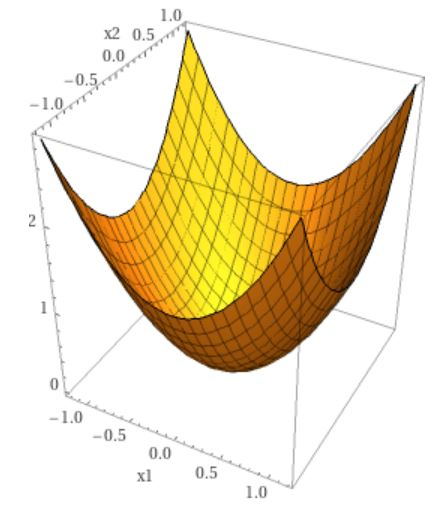

In [13]:
# 함수 지정
def function(x):
  return x[0]**2 + x[1]**2

# 초깃값 설정
init_x = np.array([-3.0, 4.0])

print(gradient_descent(function, init_x, lr = 0.1, step_num = 100))

[-0.0005 -0.0005]


### 오류역전파 알고리즘

오류역전파 알고리즘을 통해 cos 함수 구현하기

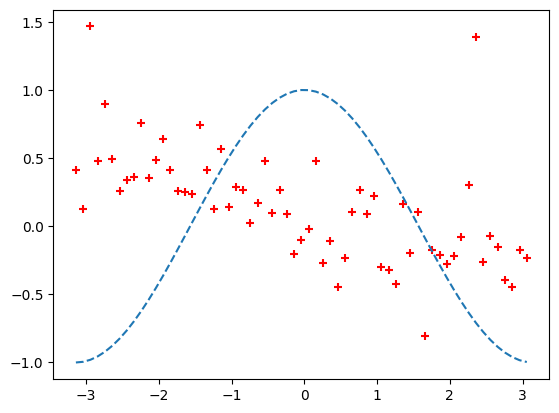

Epoch : 1 , Error :0.40365152645207153


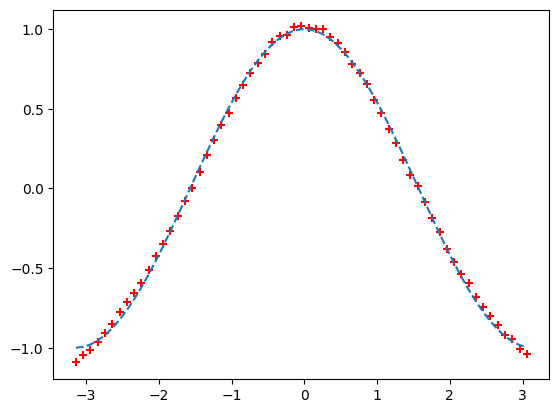

Epoch : 500 , Error :0.00035173389310498245


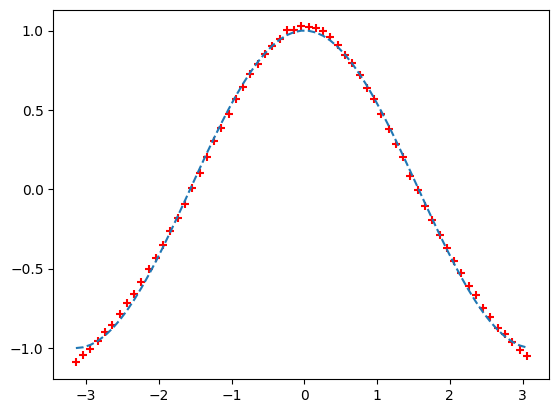

Epoch : 1000 , Error :0.0003502734617754945


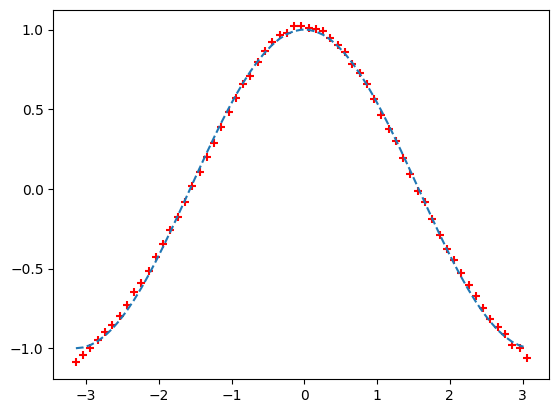

Epoch : 1500 , Error :0.00032332962514818395


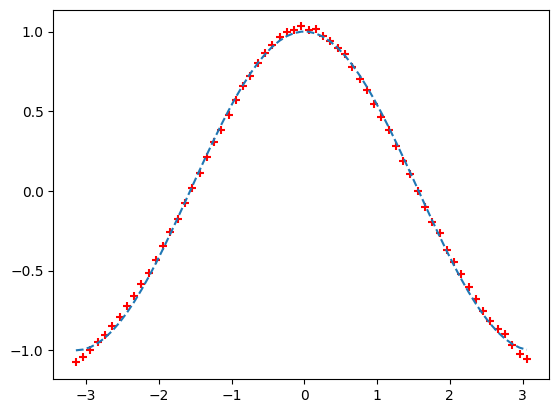

Epoch : 2000 , Error :0.00032551873715836284


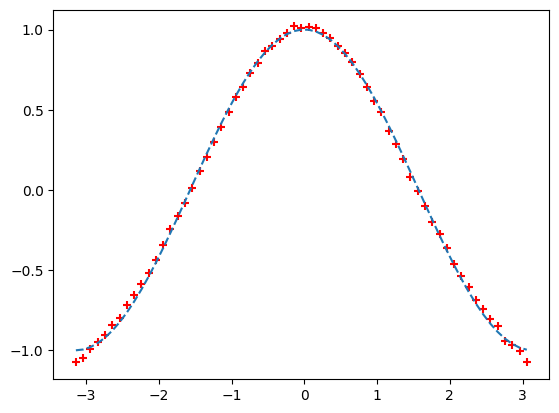

Epoch : 2500 , Error :0.00030931469410446264


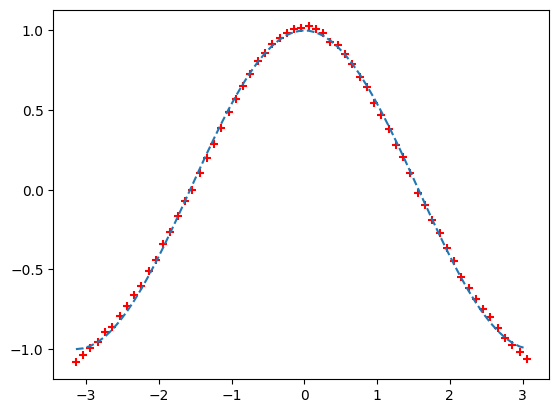

Epoch : 3000 , Error :0.0002942111872054253


In [14]:
%matplotlib inline
import matplotlib.pyplot as plt

#입력과 정답 준비
input_data = np.arange(-np.pi, np.pi, 0.1)  #입력: -pi ~ +pi 까지 0.1씩
correct_data = np.cos(input_data)        #정답
input_data = (input_data + np.pi)/(2*np.pi)  #정규화
n_data = len(correct_data)               #데이터 수

#각 설정 값
n_in = 1    #입력층의 뉴런 수
n_hid = 3   #은닉층의 뉴런 수
n_out = 1   #출력층의 뉴런 수

#wb_width = 1
eta = 0.1       #학습률
epoch = 3000
interval = 500    #경과 표시 간격

#은닉층
class HiddenLayer:
  def __init__(self, n_upper, n):   #초기설정
    #가중치 행렬과 편향 벡터
    self.w = np.random.randn(n_upper, n)
    self.b = np.random.randn(n)

  def forward(self, x):             #순전파
    self.x = x
    u = np.dot(x, self.w) + self.b
    self.y = 1/(1 + np.exp(-u))     #시그모이드 함수

  def backward(self, grad_y):       #역전파
    delta = grad_y * (1 - self.y)*self.y
    self.grad_w = np.dot(self.x.T, delta)
    self.grad_b = np.sum(delta, axis=0)
    self.grad_x = np.dot(delta, self.w.T)

  def update(self, eta):          #가중치와 편향 수정
    self.w -= eta * self.grad_w
    self.b -= eta * self.grad_b

#출력층
class OutputLayer:
  def __init__(self, n_upper, n):
    self.w = np.random.randn(n_upper, n)
    self.b = np.random.rand(n)

  def forward(self, x):   #순전파
    self.x = x
    u = np.dot(x, self.w) + self.b
    self.y = u

  def backward(self, t):  #역전파
    delta = self.y - t
    self.grad_w = np.dot(self.x.T, delta)
    self.grad_b = np.sum(delta, axis=0)
    self.grad_x = np.dot(delta, self.w.T)

  def update(self, eta):  #가중치와 편향 수정
    self.w -= eta * self.grad_w
    self.b -= eta * self.grad_b

#각 층의 초기화
hidden_layer = HiddenLayer(n_in, n_hid)
output_layer = OutputLayer(n_hid, n_out)

#학습
for i in range(epoch):

  #인덱스 임의로 섞기
  index_random = np.arange(n_data)
  np.random.shuffle(index_random)

  #결과표시
  total_error = 0
  plot_x = []
  plot_y = []

  for idx in index_random:

    x = input_data[idx:idx+1]   #입력
    t = correct_data[idx:idx+1] #출력

    #순전파
    hidden_layer.forward(x.reshape(1,1))  #입력을 행렬로 변환
    output_layer.forward(hidden_layer.y)

    #역전파
    output_layer.backward(t.reshape(-1,1))  #정답을 행렬로 변환
    hidden_layer.backward(output_layer.grad_x)

    #가중치와 편향 수정
    hidden_layer.update(eta)
    output_layer.update(eta)

    if i==0 or (i+1)%interval ==0:

      y = output_layer.y.reshape(-1)  #행렬을 벡터로 되돌림

      #오차제곱합 계산
      total_error += 1.0/2.0*np.sum(np.square(y-t))

      #출력기록
      plot_x.append(x)
      plot_y.append(y)

  if i==0 or (i+1)%interval == 0:

    #출력 그래프 표시
    plt.plot(input_data*2*np.pi - np.pi, correct_data, linestyle = 'dashed')
    plt.scatter(np.array(plot_x) *2* np.pi - np.pi, plot_y, marker = '+', color='red')
    plt.show()

    #에포크 수와 오차 표시
    print('Epoch :', i+1,',','Error :' + str(total_error/n_data))

### MNIST 데이터를 활용해 단순 신경망 알고리즘 구현하기

In [32]:
transform = transforms.Compose(
    [
        # 랜덤한 가로 회전 (RandomRotation 사용, 각도 범위 지정)
        transforms.RandomRotation(degrees=45),
        # 이미지를 텐서로 변환 (ToTensor 사용, 채널 수 1)
        transforms.ToTensor(),
        # 이미지 정규화 (평균과 표준편차 지정)
        transforms.Normalize(mean=0.5, std=0.5),
    ]
)

train_dataset = MNIST(root="./data", train=True, transform=transform, download=True)
test_dataset = MNIST(root="./ data", train=False, transform=transform, download=True)

train_loader = DataLoader(train_dataset, batch_size = 64, shuffle = True)
test_loader = DataLoader(test_dataset, batch_size = 64, shuffle = True)

class BasicNN(nn.Module):
  def __init__(self):
    super(BasicNN, self).__init__()

    self.fc1 = nn.Linear(784, 128)  #첫번째 은닉층
    self.fc2 = nn.Linear(128, 64)   #두번째 은닉층
    self.fc3 = nn.Linear(64, 10)    #출력층


  def forward(self, x):
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        x = torch.relu(x)
        x = self.fc2(x)
        x = torch.relu(x)
        x = self.fc3(x)
        x = torch.log_softmax(x, dim=1)
        return x

In [33]:
model = BasicNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

In [34]:
epochs = 10
for epoch in range(epochs):
    model.train()
    for data, target in train_loader:
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()

    model.eval()
    val_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            output = model(data)
            val_loss += criterion(output, target).item()
            pred = output.argmax(dim=1)
            correct += pred.eq(target.view_as(pred)).sum().item()

    val_loss /= len(test_loader.dataset)
    accuracy = correct / len(test_loader.dataset) * 100
    print(f"Epoch {epoch}, Validation Loss: {val_loss:.4f}, Accuracy: {accuracy:.2f}%")

Epoch 0, Validation Loss: 0.0059, Accuracy: 88.07%
Epoch 1, Validation Loss: 0.0039, Accuracy: 91.88%
Epoch 2, Validation Loss: 0.0038, Accuracy: 92.29%
Epoch 3, Validation Loss: 0.0032, Accuracy: 93.57%
Epoch 4, Validation Loss: 0.0031, Accuracy: 93.82%
Epoch 5, Validation Loss: 0.0026, Accuracy: 94.80%
Epoch 6, Validation Loss: 0.0026, Accuracy: 94.91%
Epoch 7, Validation Loss: 0.0023, Accuracy: 95.48%
Epoch 8, Validation Loss: 0.0024, Accuracy: 95.26%
Epoch 9, Validation Loss: 0.0024, Accuracy: 95.39%


In [35]:
test_loss = 0
correct = 0
model.eval()
with torch.no_grad():
    for data, target in test_loader:
        output = model(data)
        test_loss += criterion(output, target).item()
        # 정확도 계산 (예측된 클래스와 실제 클래스 비교)
        pred = output.argmax(dim=1)
        correct += pred.eq(target.view_as(pred)).sum().item()

test_loss /= len(test_loader.dataset)
test_accuracy = correct / len(test_loader.dataset) * 100
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.2f}%")

Test Loss: 0.0023, Test Accuracy: 95.31%
